In [1]:
# Exercise
# Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

# 1. Now do some exploratory data analysis to figure out which variables have direct and 
#    clear impact on employee retention (i.e. whether they leave the company or continue to work)
# 2. Plot bar charts showing impact of employee salaries on retention
# 3. Plot bar charts showing corelation between department and employee retention
# 4. Now build logistic regression model using variables that were narrowed down in step 1
# 5. Measure the accuracy of the model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('DataSet/HR_comma_sep.csv')
data.shape

(14999, 10)

In [4]:
data.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'Department', 'salary'],
      dtype=object)

In [5]:
data.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [6]:
# data.isna().sum()

# Y_ = data[['left']]
# Y_

data.left.sum()

3571

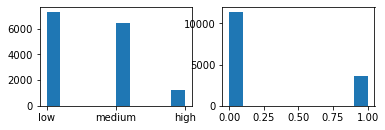

In [7]:
plt.subplot(2,2,1)

# plt.bar(data['salary'],data.left)
plt.hist(data.salary)
plt.subplot(2,2,2)
plt.hist(data.left)

plt.show()

In [8]:
(data['salary'] == 'high').sum()

1237

<AxesSubplot:xlabel='salary'>

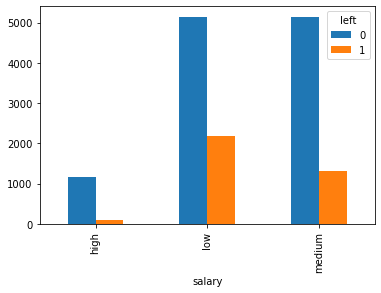

In [9]:
pd.crosstab(data.salary,data.left).plot(kind='bar')

In [10]:
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [11]:
# satisfaction_level
# average_montly_hours
# promotion_last_5years

<AxesSubplot:xlabel='salary'>

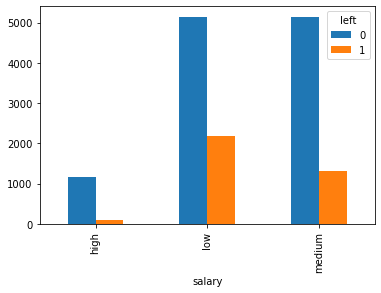

In [12]:
# plt.plot(data['satisfaction_level'],data.average_montly_hours)
pd.crosstab(data.salary,data.left).plot(kind='bar')


<AxesSubplot:xlabel='Department'>

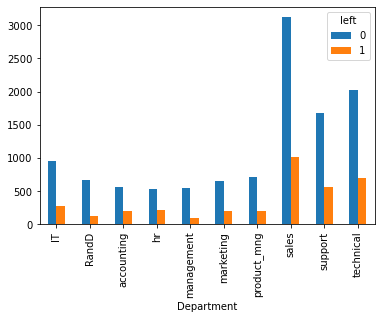

In [13]:
pd.crosstab(data.Department,data.left).plot(kind='bar')

<AxesSubplot:xlabel='number_project'>

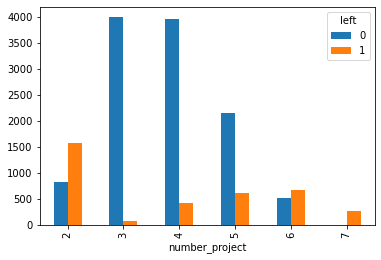

In [14]:
pd.crosstab(data.number_project,data.left).plot(kind='bar')

<AxesSubplot:xlabel='promotion_last_5years'>

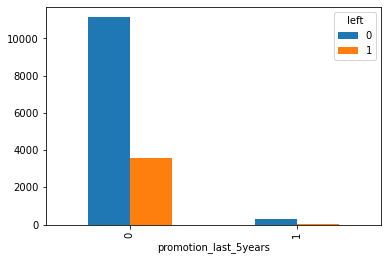

In [15]:

pd.crosstab(data.promotion_last_5years,data.left).plot(kind='bar')

In [16]:
# Key Factors
# promotion_last_5years
# salary
# average_montly_hours
# satisfaction_level


In [17]:
X_ = data[['satisfaction_level','average_montly_hours','salary','promotion_last_5years']]
X_

,satisfaction_level,average_montly_hours,salary,promotion_last_5years
0,0.38,157,low,0
1,0.80,262,medium,0
2,0.11,272,medium,0
3,0.72,223,low,0
4,0.37,159,low,0
...,...,...,...,...
14994,0.40,151,low,0
14995,0.37,160,low,0
14996,0.37,143,low,0
14997,0.11,280,low,0


In [18]:
dummies = pd.get_dummies(X_.salary)
dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [19]:
dummies = dummies.drop(['medium'],axis=1)

In [20]:
dummies

,high,low
0,0,1
1,0,0
2,0,0
3,0,1
4,0,1
...,...,...
14994,0,1
14995,0,1
14996,0,1
14997,0,1


In [21]:
final_X = pd.concat([X_,dummies],axis=1)

In [22]:
final_X

,satisfaction_level,average_montly_hours,salary,promotion_last_5years,high,low
0,0.38,157,low,0,0,1
1,0.80,262,medium,0,0,0
2,0.11,272,medium,0,0,0
3,0.72,223,low,0,0,1
4,0.37,159,low,0,0,1
...,...,...,...,...,...,...
14994,0.40,151,low,0,0,1
14995,0.37,160,low,0,0,1
14996,0.37,143,low,0,0,1
14997,0.11,280,low,0,0,1


In [23]:
data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [24]:
final_X.notna().sum()

satisfaction_level       14999
average_montly_hours     14999
salary                   14999
promotion_last_5years    14999
high                     14999
low                      14999
dtype: int64

In [25]:
final_X

,satisfaction_level,average_montly_hours,salary,promotion_last_5years,high,low
0,0.38,157,low,0,0,1
1,0.80,262,medium,0,0,0
2,0.11,272,medium,0,0,0
3,0.72,223,low,0,0,1
4,0.37,159,low,0,0,1
...,...,...,...,...,...,...
14994,0.40,151,low,0,0,1
14995,0.37,160,low,0,0,1
14996,0.37,143,low,0,0,1
14997,0.11,280,low,0,0,1


In [26]:
# final_X.shape
final_X = final_X.drop(['salary'],axis=1)

In [27]:
final_Y = data.left

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(final_X,final_Y,test_size=.01)

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [31]:
model.fit(final_X,final_Y)

LogisticRegression()

In [32]:
final_X

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1
...,...,...,...,...,...
14994,0.40,151,0,0,1
14995,0.37,160,0,0,1
14996,0.37,143,0,0,1
14997,0.11,280,0,0,1


In [33]:
model.score(X_test,y_test)

0.7733333333333333

In [34]:
# for x in model.predict(X_test):
#     print(x)
len(X_test)

150

In [35]:
import joblib

In [36]:
joblib.dump(model,'hr_analysis_joblib_model')

['hr_analysis_joblib_model']

In [37]:
# Exporting using Pickle


In [38]:
import pickle

In [39]:
with open('hr_analysis_pickle_model','wb') as f:
    pickle.dump(model,f)

In [40]:
with open('hr_analysis_pickle_model','rb') as f:
    md = pickle.load(f)
    


In [41]:
md.predict([[0.38,157,0,0,1]])

array([0], dtype=int64)